# Car Price Prediction Project

Learning: Machine Learning Bookcamp https://www.manning.com/books/machine-learning-bookcamp

**Project Plan**
1. Download the dataset.
    https://www.kaggle.com/CooperUnion/cardataset

2. Preliminary data analysis
3. Validation strategy
4. linear regression model in numpy
5. feature engineering to improve model
6. make model stable with regularization and predict

### EDA
1. Distribution of the target variable
2. Features in this dataset
3. Distribution of values in these features
4. Quality of data
5. Number of missing values

In [2]:
#importing libraries
import pandas as pd #library for tabular operations
import numpy as np #library for numerical operations

import matplotlib.pyplot as plt #visual
import seaborn as sns

%matplotlib inline 

In [3]:
#reading and preparing data
df = pd.read_csv("data/data.csv")

In [4]:
len(df)

11914

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
#removing inconsistencies in data columns
#lowercase all columns and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ','_')

#selecting columns with string values
string_columns = list(df.dtypes[df.dtypes=='object'].index)

#lowercase and replace spaces with underscores for values in all string columns
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [8]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

### Data Knowledge

• make — make of a car (BMW, Toyota, and so on) <br>
• model — model of a car <br>
• year — year when the car was manufactured <br>
• engine_fuel_type — type of fuel the engine needs (diesel, electric, and so on) <br>
• engine_hp — horsepower of the engine<br>
• engine_cylinders — number of cylinders in the engine<br>
• transmission_type — type of transmission (automatic or manual)<br>
• driven_wheels — front, rear , all<br>
• number_of_doors — number of doors a car has<br>
• market_category — luxury, crossover, and so on<br>
• vehicle_size — compact, midsize, or large<br>
• vehicle_style — sedan or convertible<br>
• highway_mpg — miles per gallon (mpg) on the highway <br>
• city_mpg — miles per gallon in the city <br>
• popularity — number of times the car was mentioned in a Twitter stream <br>
• msrp — manufacturer’s suggested retail price <br>

**MSRP** column is our target column

**Target varibale analysis**

<AxesSubplot:xlabel='msrp', ylabel='Count'>

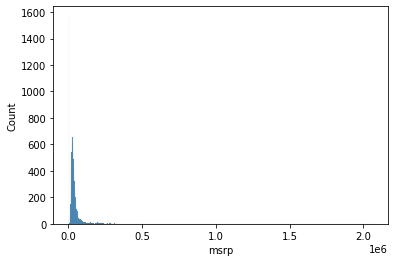

In [13]:
sns.histplot(df.msrp, kde=False) 

We can see many values at the low end of the orice and almost nothing at the high end side. This is a typical long tail distribution which is usually seen in prices. There are very few items with higher pries and many items with low prices.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

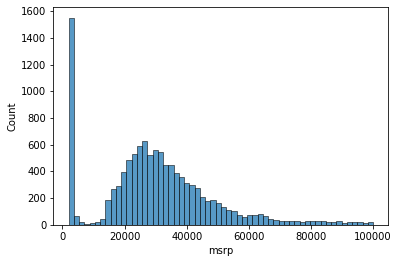

In [15]:
sns.histplot(df.msrp[df.msrp < 100000])

Many cars are just 1000 dollors. And the long tail distribution will confuse the model and can become difficult for us. 

So, we transoform the data and apply log function to the price, it removes the undsired effect.

the +1 part is important in cases that have zeroes. The log of zero is minus infinity but the log of one is zero. If our values are all non-negative,by adding 1, we make sure that they won't go below zero.

In [17]:
log_price = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

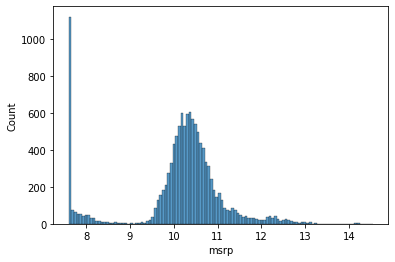

In [18]:
sns.histplot(log_price)

This transformation removed the long tail and now the distribution is bell-shaped curve. The distribution is not normal, but now model can deal with it easily.

**Checking for missing values**

In [19]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We have quite a bit of missing values in the market_category columns. We'll deal with this later.

**Split the data**

20% test <br>
20% validation <br>
60% training<br>

In [20]:
n = len(df)

#calculating how many rows for train, val, test
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val+n_test)

#random seed to make sure results are reproducable
np.random.seed(42)
#create an array from 0 to n-1 and shuffle it
idx = np.arange(n)
np.random.shuffle(idx)

#use the array with indices to get shuffled ddataframe
df_shuffled = df.iloc[idx]

#split the shuffled data
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [21]:
df_shuffled.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3995,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
7474,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
7300,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650
3148,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,16170
747,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,2000


Our initial analysis showed a long tail distribution, let's remove it using log transoformation

In [22]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

Now we should remove target variable from our data

In [23]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']